# Importing libraries for 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

# Introduction
- In this notebook we explore the factors that might influence the lung capacity among children.
- The dataset includes measurements such as age and height as well as categorical details like smoking status, gender, and whether the child was born
 via caesarean.
- Our curiosity is piqued by the potential predictors for lung capacity and the intriguing relationships among these factors.


In [ ]:
# importing file as df
df = pd.read_csv('LungCapData.csv')

In [3]:
df

,Unnamed: 0,LungCap,Age,Height,Smoke,Gender,Caesarean
0,1,6.475,6,62.1,no,male,no
1,2,10.125,18,74.7,yes,female,no
2,3,9.550,16,69.7,no,female,yes
3,4,11.125,14,71.0,no,male,no
4,5,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...,...
720,721,5.725,9,56.0,no,female,no
721,722,9.050,18,72.0,yes,male,yes
722,723,3.850,11,60.5,yes,female,no
723,724,9.825,15,64.9,no,female,no


In [4]:
#checking null values in datasets
df.isna().sum()

Unnamed: 0    0
LungCap       0
Age           0
Height        0
Smoke         0
Gender        0
Caesarean     0
dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  725 non-null    int64  
 1   LungCap     725 non-null    float64
 2   Age         725 non-null    int64  
 3   Height      725 non-null    float64
 4   Smoke       725 non-null    object 
 5   Gender      725 non-null    object 
 6   Caesarean   725 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 39.8+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  725 non-null    int64  
 1   LungCap     725 non-null    float64
 2   Age         725 non-null    int64  
 3   Height      725 non-null    float64
 4   Smoke       725 non-null    object 
 5   Gender      725 non-null    object 
 6   Caesarean   725 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 39.8+ KB


# Data cleaning and preprocessing
- Before diving deeper into the analysis, we tidy up the data.
- This includes handling any unnecessary columns, checking data types and missing values, and confirming that the categorical and numerical columns are properly set.



In [ ]:
# droping feature which doesnt have correlation  
df.drop('Unnamed: 0',axis=1,inplace=True)

In [35]:
# showing head values 
df.head(10)

,Unnamed: 0,LungCap,Age,Height,Smoke,Gender,Caesarean
0,1,6.475,6,62.1,no,male,no
1,2,10.125,18,74.7,yes,female,no
2,3,9.550,16,69.7,no,female,yes
3,4,11.125,14,71.0,no,male,no
4,5,4.800,5,56.9,no,male,no
5,6,6.225,11,58.7,no,female,no
6,7,4.950,8,63.3,no,male,yes
7,8,7.325,11,70.4,no,male,no
8,9,8.875,15,70.5,no,male,no
9,10,6.800,11,59.2,no,male,no


In [9]:
df.describe()

,LungCap,Age,Height
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


# Exploratary Data Analysis
- Now we begin exploring the data for interesting patterns and statistics. 
- We will examine distributions, study correlations among variables, and look at how categorical variables distribute across our data points.



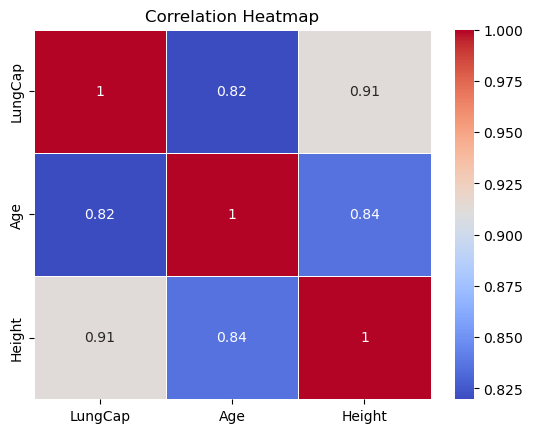

In [ ]:
# correlation between only numrical columns :

df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

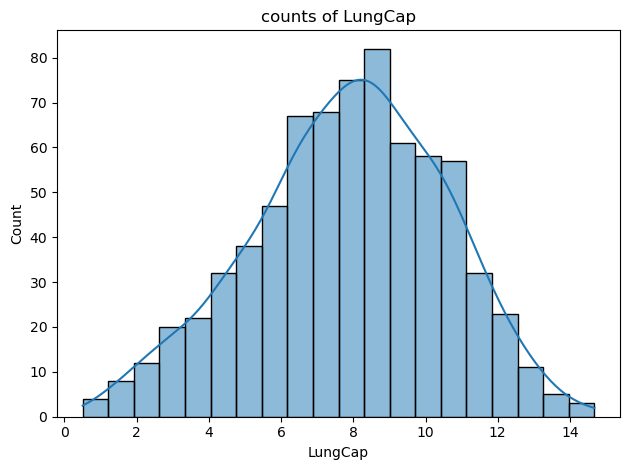

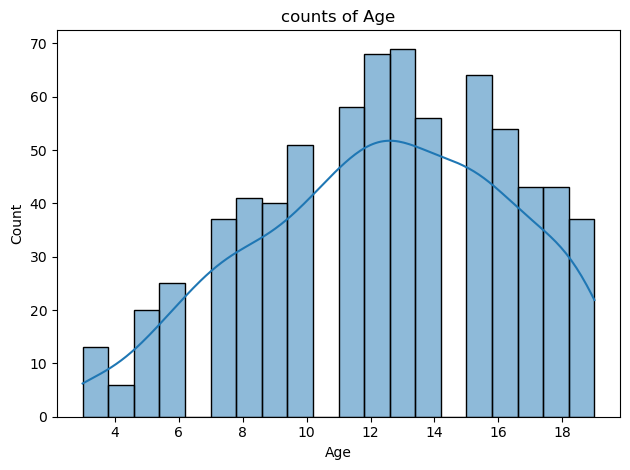

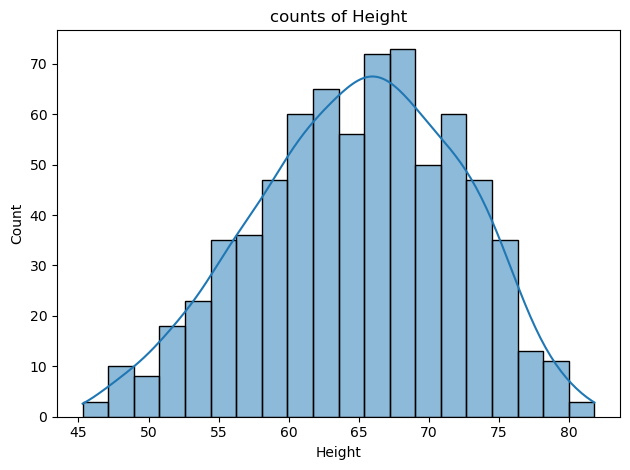

In [11]:
#counts values of object columns by Lung capicity:

num = df.select_dtypes(include='number')

for obj in num.columns:
    sns.histplot(df[obj],kde=True,bins=20)
    plt.title(f'counts of {obj}')
    plt.tight_layout()
    plt.show()

In [12]:
obj = df.select_dtypes('object')
obj

,Smoke,Gender,Caesarean
0,no,male,no
1,yes,female,no
2,no,female,yes
3,no,male,no
4,no,male,no
...,...,...,...
720,no,female,no
721,yes,male,yes
722,yes,female,no
723,no,female,no


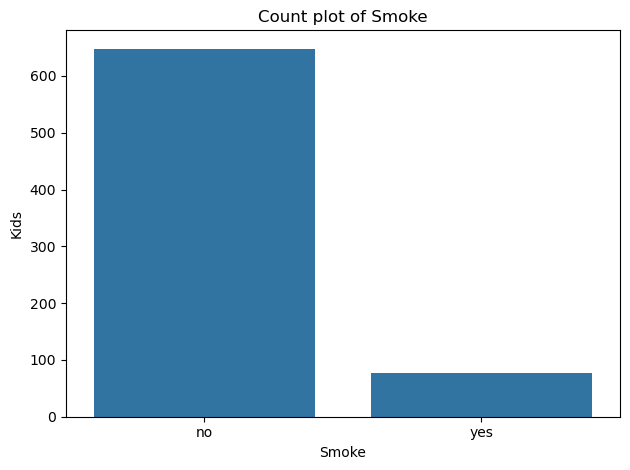

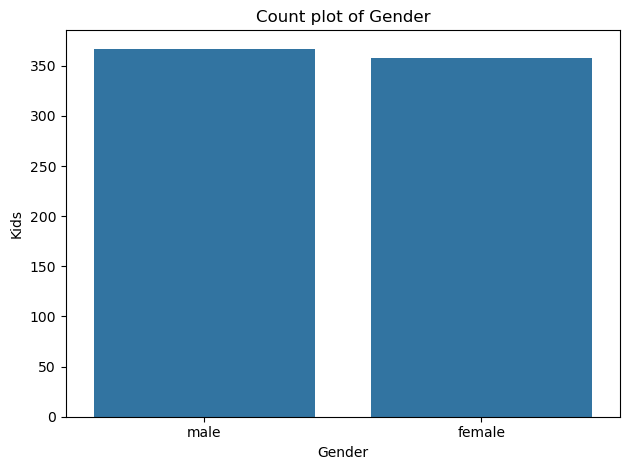

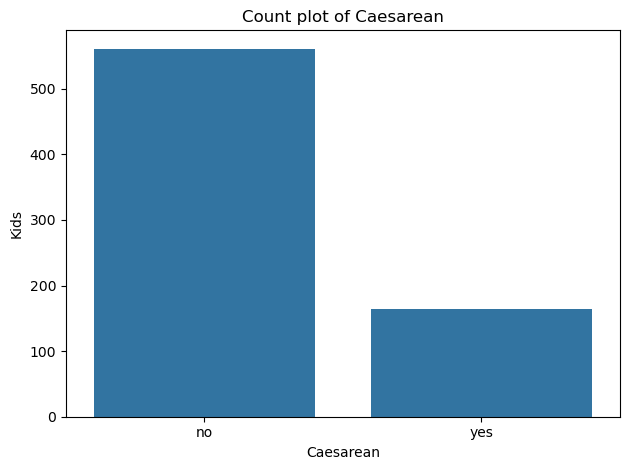

In [13]:
# Check the count of categorical variables

obj = df.select_dtypes(object)

for col in obj.columns:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f'Count plot of {col}')
    plt.ylabel('Kids')
    plt.tight_layout()
    plt.show()

# Data Visualization

- Here we apply various visualization techniques to discover patterns and relationships within the data.
- We will generate a pair plot to assess bivariate relationships, box plots and violin plots for distribution and outlier analysis, and even grouping - - techniques for comparison.

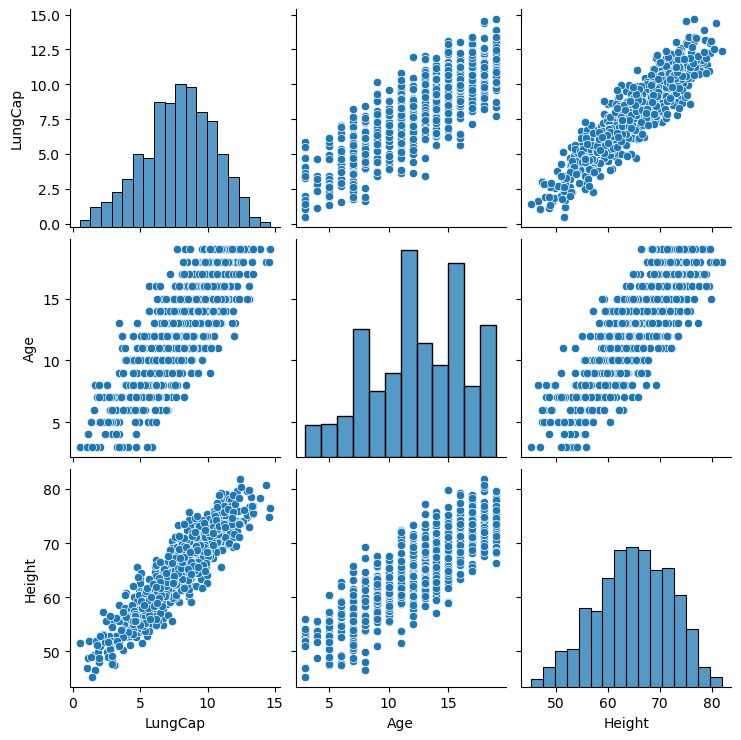

In [ ]:
sns.pairplot(df)

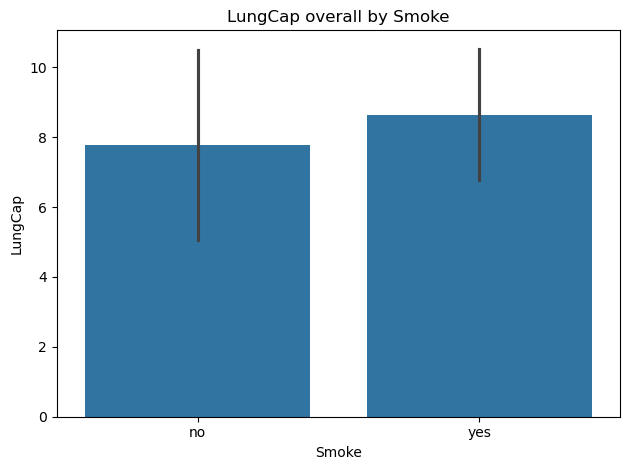

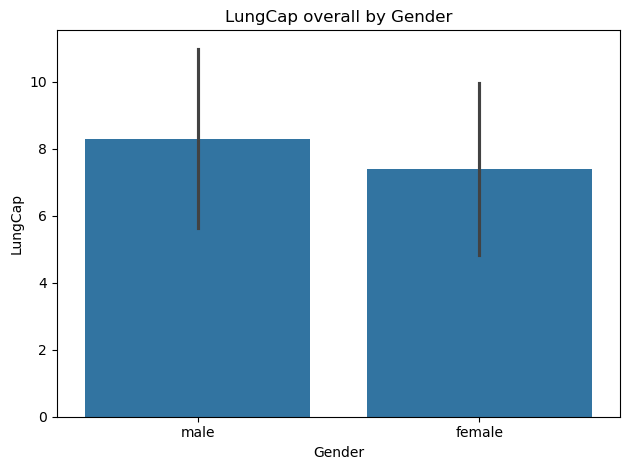

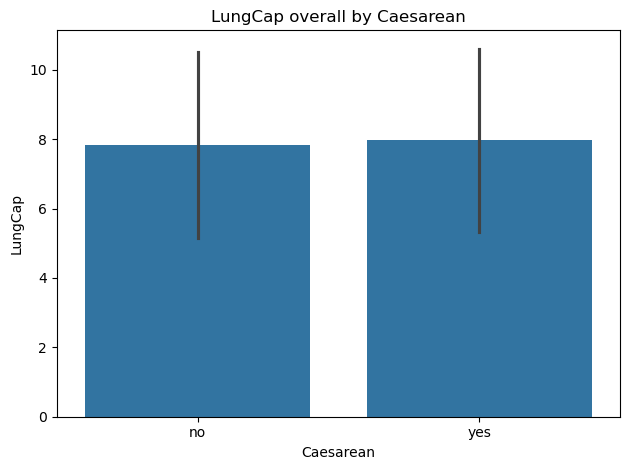

In [15]:
#Bar Plot: Average Lung Capacity by object columns:
for col in obj.columns:
    plt.figure()
    sns.barplot(x=col,y='LungCap',ci='sd',data=df)    
    plt.title(f'LungCap overall by {col}')
    plt.tight_layout()
    plt.show()


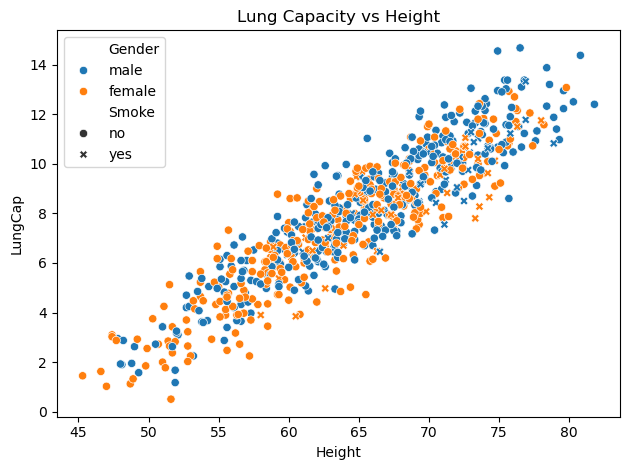

In [16]:
# Scatter Plot: Height vs Lung Capacity
sns.scatterplot(data=df, x='Height', y='LungCap', hue='Gender', style='Smoke')
plt.title('Lung Capacity vs Height')
plt.tight_layout()
plt.show()


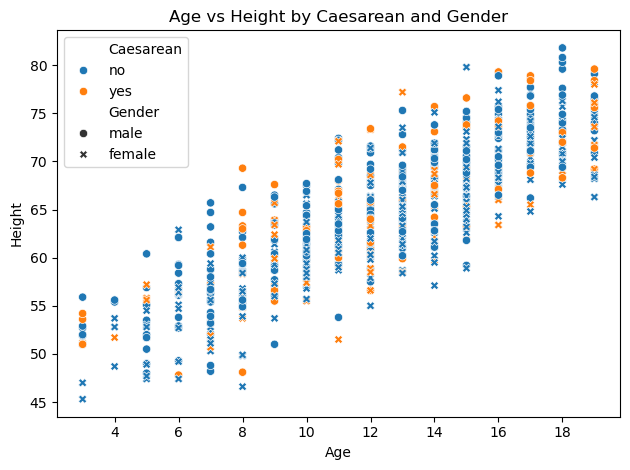

In [17]:
# Scatter Plot: Age vs Height colored by Caesarean
sns.scatterplot(data=df, x='Age', y='Height', hue='Caesarean', style='Gender')
plt.title('Age vs Height by Caesarean and Gender')
plt.tight_layout()
plt.show()

# predictive modeling
In this section we attempt to build a predictor for Lung Capacity. We hypothesize that factors such as Age, Height, Smoke, and Gender can help determine LungCap. As LungCap is a continuous variable, we use a regression model. We split the data into training and testing sets, fit a linear regression model and compute the R² score to evaluate our predictions.

A note for fellow notebook creators: when encountering issues with categorical variables, remember to perform one-hot encoding or similar transformations to allow the model to properly ingest categorical data.



In [ ]:
#create a copy datasets for model 
df_model = df.copy()

In [19]:
df_model

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [20]:
# Label Encode encode categorical variables

encode = LabelEncoder()
df_model['Smoke'] = encode.fit_transform(df_model['Smoke'])
df_model['Gender'] = encode.fit_transform(df_model['Gender'])
df_model['Caesarean'] = encode.fit_transform(df_model['Caesarean'])


In [21]:
df_model

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0
...,...,...,...,...,...,...
720,5.725,9,56.0,0,0,0
721,9.050,18,72.0,1,1,1
722,3.850,11,60.5,1,0,0
723,9.825,15,64.9,0,0,0


In [23]:
# Define feature x and target Y 
x = df_model.drop('LungCap',axis=1)
y = df_model.LungCap

In [26]:
# Split datasets into training and testing datasets 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=51)

In [27]:
#check shape of train and test datasets
x_train.shape,y_train.shape

((580, 5), (580,))

In [29]:
# Instantiate and train the Linear Regression model
lr = LinearRegression()
lr

LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
# Make predictions on the test set
y_pred = lr.predict(x_test)
y_pred

array([ 3.30651031,  4.60333371,  6.77058793,  6.54671625,  8.55611789,
        5.24756608,  3.44941047,  5.38454827,  7.57264211,  7.23931667,
        9.46161691, 10.98671799,  8.15283691,  7.2348329 ,  9.22796964,
       10.98674202,  9.63263678, 11.71585158,  9.84683058,  5.51185258,
        6.37998065, 10.08799873, 10.25330013,  8.27353017, 10.00626206,
        7.79433277,  5.24167214,  4.4470908 ,  8.62901446,  3.39210461,
        9.89163146,  7.1231741 ,  4.49847869,  8.34848709,  8.61346666,
        5.54148426,  9.90571534,  9.24133642,  5.11146971,  8.21687448,
        7.33968792,  7.17594815,  8.23840718, 10.32895012, 10.4912557 ,
       10.33570586, 10.86700825,  9.09846029, 10.99261194,  7.05913653,
        9.24061932,  6.0228867 ,  6.31002511,  2.58346341,  9.16321497,
       12.34223341,  4.05579044,  8.02939022,  8.06451321,  8.96006793,
        5.94545832,  3.53498074,  9.60657227,  8.48475217, 10.66227557,
        5.46338683,  7.22285228,  7.37840211,  8.12018538,  7.13

In [32]:
# Evaluate predictions
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R^2 Score: 0.8656
Mean Squared Error: 0.9201


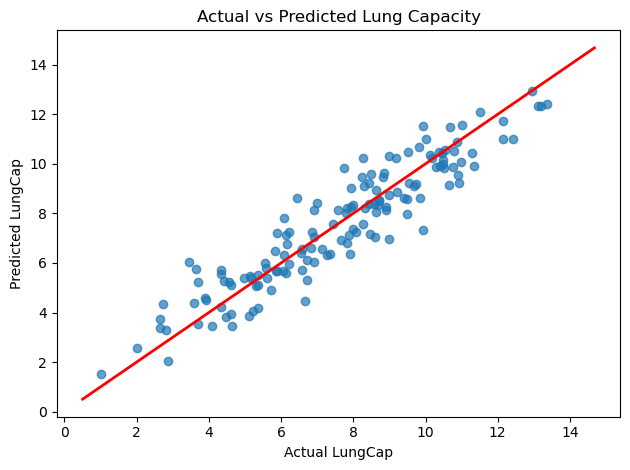

In [33]:
# Optional: Plotting the relationship between actual and predicted LungCap
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual LungCap')
plt.ylabel('Predicted LungCap')
plt.title('Actual vs Predicted Lung Capacity')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Diagonal line
plt.tight_layout()
plt.show()
